<a href="https://colab.research.google.com/github/anjaleeDS/CS06/blob/main/Lab1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python 101

Python, was developed by Guido van Rossum and released around 1991.

It's variables can represent many things:

1. Number and words
2. Excel sheet formatted data (pandas)
3. Functions and Objects (python is OOP)


In [ ]:
# numerics

a = 3
b = 29
c = a+b
c

32

In [ ]:
# words

x = "Gasline is "
y = "cheap"
x+y

'Gasline is cheap'

In [ ]:
# lists
# '[]' represents a list

word_list = ["i","am", "awake"]

two_lists = [[1,2,3,4,5], [9.3,5.4, 3.2, 23, 2.1]]

mixed_type_list = [['hello','there','welcome'], [3,2,6], ['about you', 'i love python', 'we are great @ learning']]

# print(two_lists)
# print(mixed_type_list)
mixed_type_list

[['hello', 'there', 'welcome'],
 [3, 2, 6],
 ['about you', 'i love python', 'we are great @ learning']]

In [ ]:
# variables with logic

test_score = 65
if test_score > 84:
  print("A - Yay!")
elif (test_score <= 84):
  if (test_score <=65):
    print ("C - Redo!")
  else:
    print("B - Passed!")

C - Redo!


In [ ]:
# loops with lists
# while loops, for loops, range() loops

mylist = ['tomato','lettuce','bread','avocado']

x = 1
while (x < 10):
  print(x, " is less than 10")
  x = x+1
print(x, " is now 10")

##########

# for i in range(1,len(mylist)): # range() is a method and len()
#   print(mylist[i])

# why do we have no TOMATO??   we have no tomato because the range starts from
# 1 and list elements are labeled starting with 0 index

1  is less than 10
2  is less than 10
3  is less than 10
4  is less than 10
5  is less than 10
6  is less than 10
7  is less than 10
8  is less than 10
9  is less than 10
10  is now 10


In [ ]:
for list_thing in range(0,4):
  print(mylist[list_thing])

tomato
lettuce
bread
avocado


# Pandas

Dataframes, aka excel sheets, google sheets, Numbers app for Mac users, allow us to easily understand and manipulate data sets.

- 1 Row = record
- 1 Column = attribute
- 1 cell = value

- convention to use "df" as dataframe or aka excel sheet

In [ ]:
# create a new dataframe
import pandas as pd

new_df = pd.DataFrame()

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame


In [ ]:
# get your data from Vega data, a popular repository made available for everyone
# that contains 20 something sets of data.

import pandas as pd
from vega_datasets import data

data.list_datasets() # what data sets are in vega_datasets?
# len(data.list_datasets()) # how many was that?

df = data.stocks()
# df

## Looking at your data (aka data discovery)

Things you want to do with your data after getting it into a dataframe:

1. Look at it! 👁
- What type of data do you have?
- what are the statistics of the columns that have numbers only or are an integer/float type?
- what are the unique values in a column like "gender"?
-  do you  have any blanks? what are the number of blanks do you have for each column?
2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
import pandas as pd
from vega_datasets import data

# let's use the cars data set from vega_datasets
df = data.cars()

df.head() # looking at the first few records,
# notice on the right most side there are icons that say "convert this dataframe into an interactive table" and "suggested charts"

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [ ]:
# Data discovery

# df.shape # Things without a () are called attributes, the are part of the df package
# df.info() # Things with a () are called methods. they are not part of the package but the df package can use it with some input
# df.size # how many cells are there in total or number of rows times number of columns


df.dtypes # what are the data type of each column, but df.info() will give you column name, column type, and memory needs and dtypes!

# len(df.columns) # how many columns do we have again?
# df.columns # getting a list of column names


# df.head # look at the first few rows of your dataframe. df.tail gives the last few rows of your dataframe
# df.tail(7) # adding a number tells head attribute to return back a specific number of rows from the bottom of the dataframe


Name                        object
Miles_per_Gallon           float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Weight_in_lbs                int64
Acceleration               float64
Year                datetime64[ns]
Origin                      object
dtype: object

In [ ]:

df.isna().sum() # total number of na-s or NaNs by column
df.isnull().sum() # total number of nulls by column
df.isnull().sum().sum() # total number of nulls combined


14

## Cleaning your data

2. "Clean" it! 🧼
- are there columns that are the wrong type?  if yes, then change them!
- figure out what you want to do with the blanks? you can drop it, fill it with a fixed value, fill it with the value before or after it?

In [ ]:
# LET'S CLEAN!

# Step 1: change headers to be callable in code.

# replace all spaces in headers into '_'
df.columns = df.columns.str.replace(' ', '_')

# change every letter into lower case for all values and headers
df.columns = df.columns.str.lower()

# change columns to the right type
df.dtypes # check the column types. Does it match with what you think is the data type?

In [ ]:
# many analyses also make a copy of the data and then
# separate out the numerical from the categorical columns

# separate categorical and numerical features
num_df = df.select_dtypes(include=['int64','float64', 'datetime64'])
cat_df = df.select_dtypes(exclude=['int64','float64', 'datetime64'])

print('numerical columns:', num_df.columns, ' and categorical columns: ',cat_df.columns)

numerical columns: Index(['miles_per_gallon', 'cylinders', 'displacement', 'horsepower',
       'weight_in_lbs', 'acceleration', 'year'],
      dtype='object')  and categorical columns:  Index(['name', 'origin'], dtype='object')


## Frequently used ways to getting data

... but before you can use a dataframe you'll need data from ...

In [ ]:
import pandas as pd
from google.colab import drive

# drive.mount('/gdrive')
# %cd /gdrive


drive.mount('gdrive/', force_remount=True)
# # %ls

# # take a look at this menu with a little file symbol on the leftside, middle of page on colab screen
%cd gdrive/MyDrive/Cs 06 Winter Data Viz 2024/Outside_data
%ls



Mounted at gdrive/
/content/gdrive/MyDrive/Cs 06 Winter Data Viz 2024/Outside_data
amenities.csv


In [ ]:
# get your data from a URL

import pandas as pd

url = "https://raw.githubusercontent.com/anjaleeDS/CS06/main/Netflix%20TV%20Shows%20and%20Movies.csv"
df = pd.read_csv(url)

df.head(3)

In [ ]:
# get your data from GSHEET ANYWHERE in your google drive
# this is ddirectly from google's codesnippet icon on the lower left
# icon looks like this: < >

import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('amenities').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
my_gsheet = pd.DataFrame.from_records(rows)
my_gsheet.head(3)

,0,1,2,3
0,unified_id,month,hot_tub,pool
1,AIR10052559,2022-12,1,0
2,AIR10178668,2022-12,0,0


In [ ]:
# open a CSV file, NOT A GSHEET FILE in your google drive
# also from the code snippet icon on the lower left
import pandas as pd
from google.colab import drive

drive.mount('gdrive/', force_remount=True)
# %ls

# take a look at this menu with a little file symbol on the leftside, middle of page on colab screen
%cd gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset
%ls


In [ ]:

filename = "Mobile_Food_Facility_Permit_20240123.csv"
df = pd.read_csv(filename)
df.head()

In [ ]:
# open a file downloaded from Kaggle.com or any other dataset source that doesn't have a
# URL that has the data already in a *.csv file format

# NOT IN COLAB download file onto your computer, unzip file, and then upload it to google drive

import pandas as pd
from google.colab import drive

drive.mount("/gdrive", force_remount=True)
# drive.mount('/gdrive')
%cd /gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset/
%ls


Mounted at /gdrive
/gdrive/MyDrive/Cs 06 Winter Data Viz 2024/covid dataset


In [ ]:

df = pd.read_csv("cdc_vaccines_distributed_administered_by_jurisdiction.csv")
df.head(4)
#(original files from https://www.kaggle.com/datasets/thedevastator/cdc-covid-19-vaccine-tracker?select=cdc_vaccines_distributed_administered_national_timeseries.csv)

# Scatterplots preview

references by plot types:

[matplotlib](https://matplotlib.org/stable/plot_types/index.html)

[seaborn]()

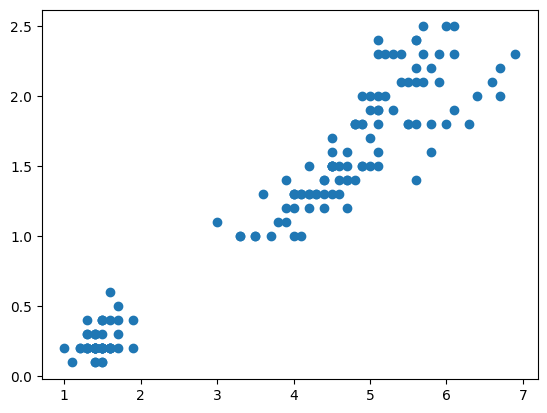

In [ ]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

# get data
df_iris = data.iris()

# create a plot sheet
fig, ax = plt.subplots()

# ask to plot a scatter plot with the following columns from the dataframe
ax.scatter(x=df_iris['petalLength'], y=df_iris['petalWidth'])


plt.show()
# import seaborn as sns